Морфологический анализ <br/>
Домашнее задание 10 <br/>
**Голев Александр 135М**

# Обработать те же изображения, что и в задании 3, методом морфологического подавления шума по следующему алгоритму.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
from itertools import product

import func as f
import mosaic_approx as ma
import old_denoiser as old
import method_7 as m7
import method_3 as m3

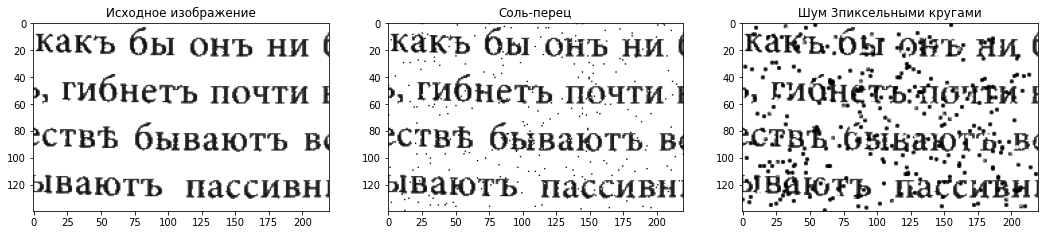

In [2]:
# Загружаем изображение
true_img,sp_img,crc_img = cv2.imread('text-d-true.png'),cv2.imread('text-d-sp.png'),cv2.imread('text-d-crc.png')
true_gray = cv2.cvtColor(true_img, cv2.COLOR_BGR2GRAY)
sp= cv2.cvtColor(sp_img, cv2.COLOR_BGR2GRAY)
crc = cv2.cvtColor(crc_img, cv2.COLOR_BGR2GRAY)

f.showOneLine([true_gray,sp,crc],['Исходное изображение','Соль-перец', 'Шум 3пиксельными кругами'] )

### 2.

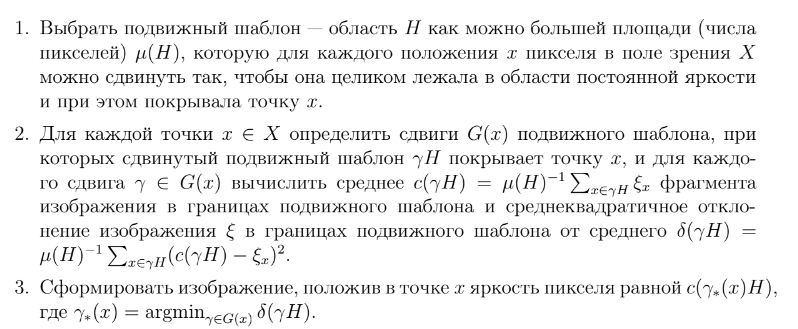
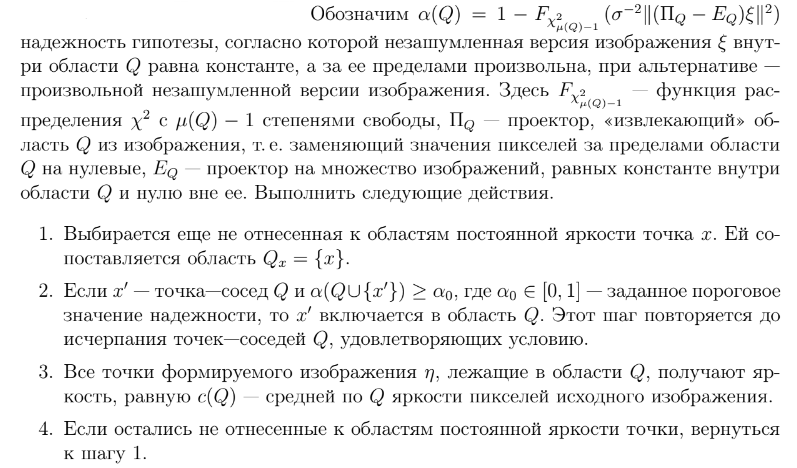
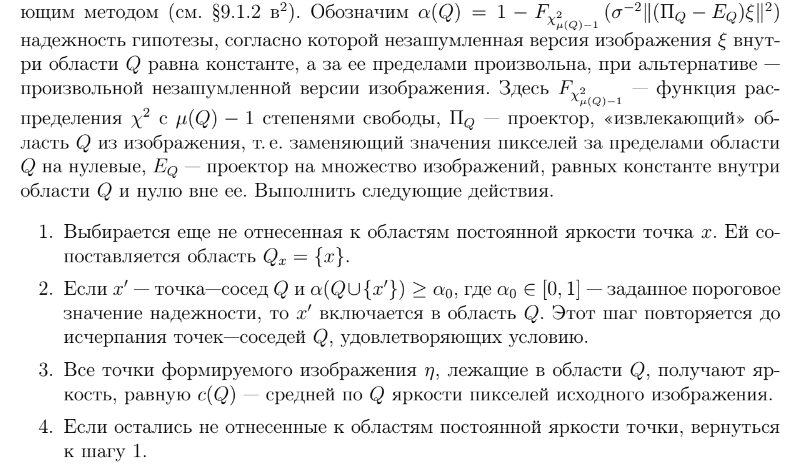

In [4]:
def horizontal_filter(img, f_size, direction):
  assert direction == 1 or direction == 0
  if direction == 0:
    return np.rot90(horizontal_filter(np.rot90(img), f_size, 1), k=3)
  H, W = img.shape
  # расширение границ
  img = np.pad(img, ((0,0), (f_size-1, f_size-1)))
  result = np.zeros((H, W))
  for y in range(0, H):
    for x in range(f_size-1, W+f_size-1):
      c_s = []
      delta_s = []
      #сдвигаем шаблон
      for i in range(f_size):
        area = img[y, x-(f_size-1)+i:x+1+i]
        #вычисляем среднее
        c = np.mean(area)
        c_s.append(c)
        temp = np.ones((1, f_size))*c
        #вычисляем среднеквадратичное отклонение
        delta  = np.mean(np.square(temp - area))
        delta_s.append(delta)
      #кладем в точку x argmin
      result[y, x - (f_size-1)] = c_s[np.argmin(delta_s)]
  result = result.astype(np.uint8)
  return result

Найдем оптимальный размер

In [5]:
best_shape, best_error = (0,0), 1
for i,j in product(range(1,6),repeat = 2):
    sp_clear = horizontal_filter(horizontal_filter(sp.copy(), i, direction=0), j, direction=1)
    error = old.mseImages(true_gray, sp_clear)
    if error< best_error:
        best_error = error
        best_shape = (i,j)
    print(f'({i},{j}) - {error}')

(1,1) - 0.004525899629013816
(1,2) - 0.002122057200776924
(1,3) - 0.00309746750750211
(1,4) - 0.009341311533526065
(1,5) - 0.016084810787059926
(2,1) - 0.0024084737638370855
(2,2) - 0.002184133724791164
(2,3) - 0.0032920862105983214
(2,4) - 0.00917543627076499
(2,5) - 0.01582364575063537
(3,1) - 0.004237699036833985
(3,2) - 0.004472956704963626
(3,3) - 0.0055546949974285605
(3,4) - 0.010990022069433832
(3,5) - 0.017863716752298062
(4,1) - 0.0072094062223820015
(4,2) - 0.007552881758764112
(4,3) - 0.008761973416817708
(4,4) - 0.014051539367975355
(4,5) - 0.02123908961088892
(5,1) - 0.009008621808794817
(5,2) - 0.009323750855065734
(5,3) - 0.010546494105663657
(5,4) - 0.01525704698991896
(5,5) - 0.02269475776050171


Построим очищенное изображение новым методом.

In [6]:
sp_clear = horizontal_filter(horizontal_filter(sp.copy(), best_shape[0], direction=0), best_shape[1], direction=1)

Построим очищенное изображение методом № 3 и № 7 .

In [3]:
sp_clear_3 = m3.sp_clear(sp)
sp_clear_7 = m7.sp_clear(sp)

Уровни квантования: 2
.


c:\Users\golev\source\repos\!Python programs\MAGA1\Morph Analysis\10-task\method_7.py:23: RuntimeWarning: invalid value encountered in double_scalars
  diff =  np.square(np.linalg.norm(diff1))/np.square(np.linalg.norm(diff2))
c:\Users\golev\source\repos\!Python programs\MAGA1\Morph Analysis\10-task\method_7.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  diff =  np.square(np.linalg.norm(diff1))/np.square(np.linalg.norm(diff2))


In [7]:
print('Этот метод -',old.mseImages(true_gray, sp_clear))
print('Метод  № 3 -',old.mseImages(true_gray, sp_clear_3))
print('Метод  № 7 -',old.mseImages(true_gray, sp_clear_7))

Этот метод - 0.002122057200776924
Метод  № 3 - 0.007447331695601592
Метод  № 7 - 0.0008333785207487631


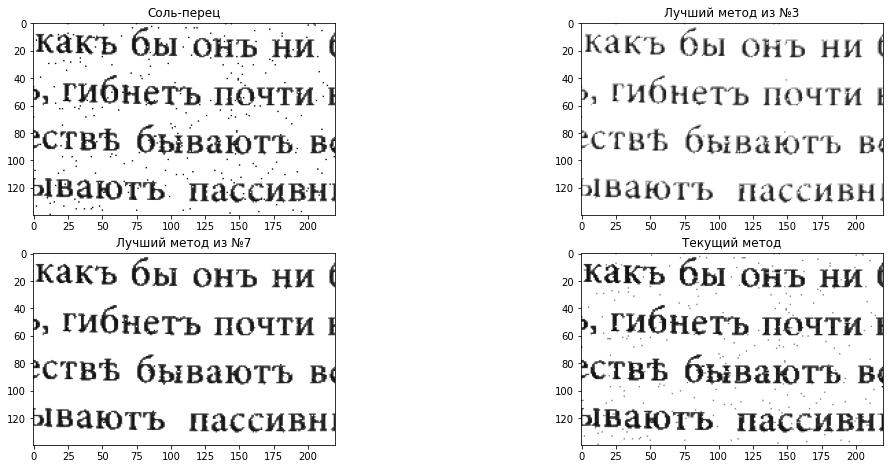

In [8]:
f.showOneLine([sp, sp_clear_3,sp_clear_7, sp_clear],['Соль-перец','Лучший метод из №3','Лучший метод из №7','Текущий метод'], dim = 2 )

## Круги

Найдем оптимальный размер

In [13]:
best_shape, best_error = (0,0), 1
for i,j in product(range(1,6),repeat = 2):
    crc_clear = horizontal_filter(horizontal_filter(crc.copy(), i, direction=0), j, direction=1)
    error = old.mseImages(true_gray, crc_clear)
    if error< best_error:
        best_error = error
        best_shape = (i,j)
    print(f'({i},{j}) - {error}')

(1,1) - 0.02595351138672938
(1,2) - 0.028160477488678184
(1,3) - 0.028078652316541587
(1,4) - 0.022288617015433627
(1,5) - 0.026375073772824636
(2,1) - 0.02857593557922278
(2,2) - 0.031130004943153735
(2,3) - 0.031054130029908575
(2,4) - 0.024032713941191452
(2,5) - 0.02764612661463873
(3,1) - 0.028725792527349622
(3,2) - 0.031733029753791
(3,3) - 0.030962418300653594
(3,4) - 0.02434055483155829
(3,5) - 0.028138168636438532
(4,1) - 0.01901919141988346
(4,2) - 0.020416462948815887
(4,3) - 0.02017674620650399
(4,4) - 0.019802137539507783
(4,5) - 0.024197848479855403
(5,1) - 0.019112371615312793
(5,2) - 0.020227908097285256
(5,3) - 0.019859511326812365
(5,4) - 0.02024975159404225
(5,5) - 0.02481542713342021


Построим очищенное изображение новым методом.

In [14]:
crc_clear = horizontal_filter(horizontal_filter(crc.copy(), best_shape[0], direction=0), best_shape[1], direction=1)

Построим очищенное изображение методом № 3 и № 7 .

In [9]:
crc_clear_3 = m3.crc_clear(crc)
crc_clear_7 = m7.crc_clear(crc)

Уровни квантования: 3
.


c:\Users\golev\source\repos\!Python programs\MAGA1\Morph Analysis\10-task\method_7.py:23: RuntimeWarning: invalid value encountered in double_scalars
  diff =  np.square(np.linalg.norm(diff1))/np.square(np.linalg.norm(diff2))


In [15]:
print('Этот метод -',old.mseImages(true_gray, crc_clear))
print('Метод  № 3 -',old.mseImages(true_gray, crc_clear_3))
print('Метод  № 7 -',old.mseImages(true_gray, crc_clear_7))

Этот метод - 0.01901919141988346
Метод  № 3 - 0.03808021090789257
Метод  № 7 - 0.011393185937476596


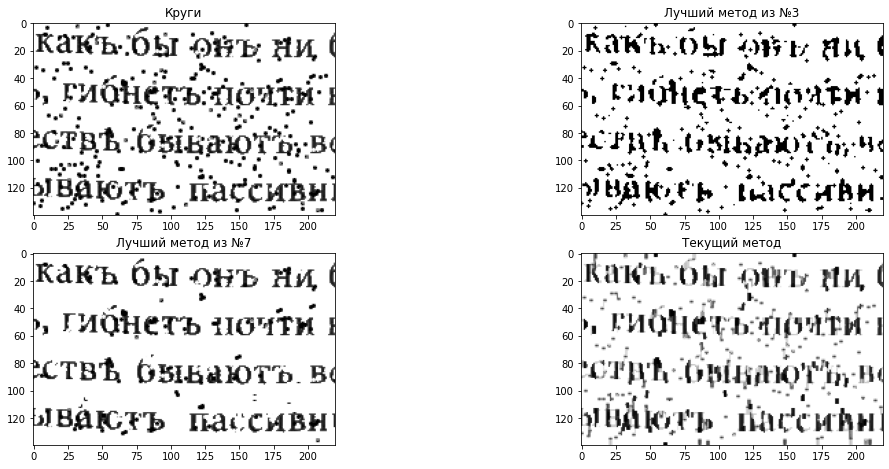

In [16]:
f.showOneLine([crc, crc_clear_3,crc_clear_7, crc_clear],['Круги','Лучший метод из №3','Лучший метод из №7','Текущий метод'], dim = 2 )